# Perzeptron

In [2]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

v1 = np.array([1, 2, 3])
v2 = np.array([4, 5 ,6])
skalar = v1.dot(v2)

elementweise = v1 * v2

In [3]:
class SimplePerceptron(object):
    def __init__(self):
        pass
    
    def heaviside(self, summe):
        '''Implementierung der Heaviside-Funktion. Parameter ist die gewichtete Summe. Es wird die vorhergesagte Klassenbezeichnungen für den Eingangsvektor 
 ermittelt.'''

        if summe >= 0:
            return 1
        else: 
            return 0

    def gewichtete_summe(self, x):
        '''In dieser Methode wird die beschriebene gewichtete Summe berechnet.'''
        return x.dot(self.w[1:]) + self.w[0]
    
    def perceptron_eval(self, X,y):
        '''Berechnung gewichtete Summe, Anwendung der Heaviside-Funktion, Ermittlung des Fehlers, Ermittlung des Gesamtfehlers'''
        self.w = np.array([-0.1,1,1]) 
        summe = self.gewichtete_summe(X)        

        output = self.heaviside(summe)
        return np.abs(output-y)

### Algorithmus ausführuen und  Gesamtfehler anzeigen

In [10]:
# 2 dimensionaler Input: x1, x2
# 4 Inputvektoren
X0 = np.array([0,0])
X1 = np.array([0,1])
X2 = np.array([1,0])
X3 = np.array([1,1])

# Die 4 gewünschten Ergebniswerte
Y0 = 0
Y1 = 1
Y2 = 1 
Y3 = 1

s1 = SimplePerceptron()

In [9]:
class Perceptron(object):
    
    def __init__(self, eta=None, epochs=None):
        self.eta = eta
        self.epochs = epochs
        self.w = np.random.normal(loc=0.01, size=3)
        self.w[0] = 1
        self.errors = []

    def gewichtete_summe(self, x):
        '''In dieser Methode wird die beschriebene gewichtete Summe berechnet.'''
        return x.dot(self.w[1:]) + self.w[0]
        
    def heaviside(self, summe):
        '''Implementierung der Heaviside-Funktion. Parameter ist die gewichtete Summe. Es wird die vorhergesagte Klassenbezeichnungen für den Eingangsvektor 
 ermittelt.'''
        return 1 if summe >= 0 else 0
    
    def fit(self, X, y):
        '''In dieser Methode wird das Training des neuronalen Netzes umgesetzt.'''
        for e in range(self.epochs):
            sum_error = 0
            for i in range(len(X)):
                summe = self.gewichtete_summe(X[i])

                prediction = self.heaviside(summe)
                error = y[i][0] - prediction
                sum_error = sum_error + np.abs(error)
                for j in range(len(self.w[1:])):
                    self.w[j+1] = self.w[j+1] + self.eta * error * X[i][j]
            print(sum_error)
            self.errors.append(sum_error)
        
        return self.errors 

In [7]:
df = pd.read_csv("../Data/iris.data", header=None, sep=",")
df_shuffled = df.sample(frac=1) 

dffilter = df_shuffled[df_shuffled[4]!="Iris-virginica"].copy()
dffilter.loc[dffilter[4] == "Iris-setosa" , 4] =  0
dffilter.loc[dffilter[4] == "Iris-versicolor" , 4] =  1

myPerceptron = Perceptron(eta=0.001, epochs=10)
    
X = np.array(dffilter[[0,2]]) 
y = np.array(dffilter[[4]]) 

error = myPerceptron.fit(X,y)

50
91
85
83
82
69
43
31
24
18


## Training und Visualisierung des Errors

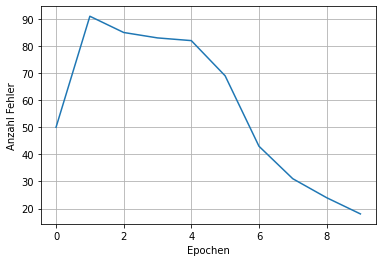

In [8]:
fig, ax = plt.subplots()
ax.plot(range(len(error)), error)

ax.set(xlabel='Epochen', ylabel='Anzahl Fehler')
ax.grid()

plt.show()